In [ ]:
import random
import matplotlib.pyplot as plt
from collections import Counter
import math
import numpy as np
from matplotlib.ticker import MaxNLocator

def simulate_tractor_full_analysis(trials=20000):
    trump_ranks = list(range(16, 0, -1))
    full_deck = [r for r in trump_ranks for _ in range(2)]
    n_results = []
    tractor_counts_per_n = {}
    max_n = -1
    max_n_details = {}

    for _ in range(trials):
        lead_size = random.randint(1, 25)
        hand = sorted(random.sample(full_deck, lead_size), reverse=True)
        original_hand = list(hand)
        temp_hand = list(hand)
        n_blocks = 0
        tractors_in_this_lead = 0

        counts = Counter(temp_hand)
        pairs = sorted([r for r, c in counts.items() if c >= 2], reverse=True)
        i = 0
        while i < len(pairs):
            length = 1
            while i + length < len(pairs) and pairs[i] - pairs[i+length] == length:
                length += 1
            if length >= 2:
                n_blocks += 1
                tractors_in_this_lead += 1
                for j in range(i, i + length):
                    temp_hand.remove(pairs[j])
                    temp_hand.remove(pairs[j])
                i += length
            else:
                i += 1

        counts = Counter(temp_hand)
        pair_ranks = [r for r, c in counts.items() if c >= 2]
        for r in pair_ranks:
            n_blocks += 1
            temp_hand.remove(r)
            temp_hand.remove(r)

        n_blocks += len(temp_hand)
        n_results.append(n_blocks)

        if n_blocks not in tractor_counts_per_n:
            tractor_counts_per_n[n_blocks] = []
        tractor_counts_per_n[n_blocks].append(tractors_in_this_lead)

        if n_blocks > max_n:
            max_n = n_blocks
            max_n_details = {'hand': original_hand, 'n': n_blocks}

    return n_results, tractor_counts_per_n, max_n_details

trials = 20000
data, tractor_stats, max_details = simulate_tractor_full_analysis(trials)
counts = Counter(data)
labels, values = zip(*sorted(counts.items()))

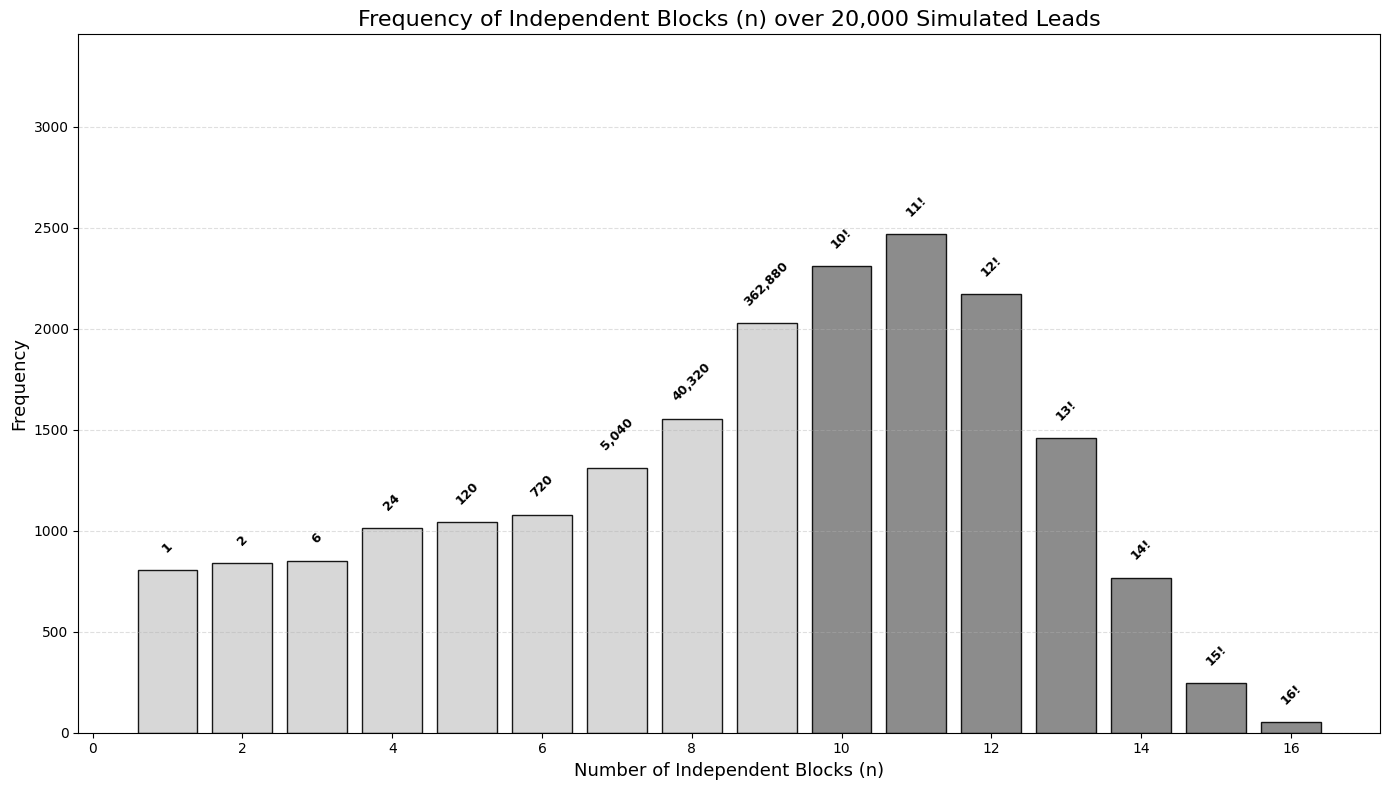

In [ ]:
plt.figure(figsize=(14, 8))
plt.ylim(0, max(values) * 1.4)
bars = plt.bar(labels, values, color='#d3d3d3', edgecolor='black', alpha=0.9)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
for bar, n in zip(bars, labels):
    yval = bar.get_height()
    label = f"{math.factorial(n):,}" if n < 10 else f"{n}!"
    plt.text(bar.get_x() + bar.get_width()/2, yval + (max(values)*0.03),
             label, ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=45)
    if n >= 10:
        bar.set_color('#808080')
        bar.set_edgecolor('black')
plt.title(f"Frequency of Independent Blocks (n) over {trials:,} Simulated Leads", fontsize=16)
plt.xlabel("Number of Independent Blocks (n)", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

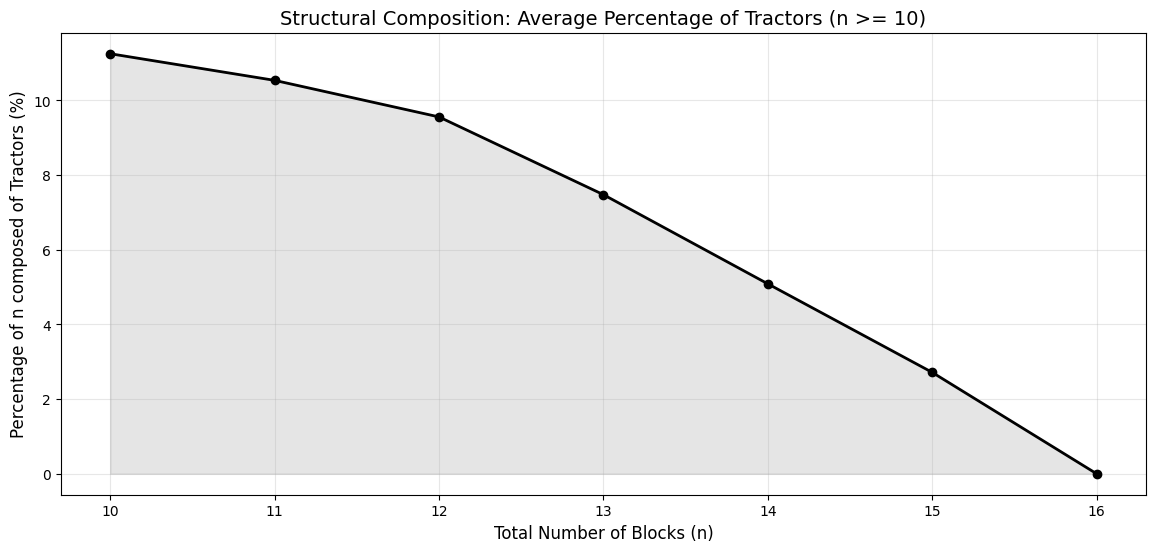

In [ ]:
n_labels_sorted = sorted(tractor_stats.keys())
high_n_labels = [n for n in n_labels_sorted if n >= 10]
avg_perc_high_n = [np.mean([(t/n)*100 for t in tractor_stats[n]]) for n in high_n_labels]

plt.figure(figsize=(14, 6))
plt.plot(high_n_labels, avg_perc_high_n, marker='o', color='black', linewidth=2)
plt.fill_between(high_n_labels, avg_perc_high_n, alpha=0.2, color='gray')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Structural Composition: Average Percentage of Tractors (n >= 10)", fontsize=14)
plt.xlabel("Total Number of Blocks (n)", fontsize=12)
plt.ylabel("Percentage of n composed of Tractors (%)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("\n" + "="*50)
print("             TRACTOR SIMULATION SUMMARY             ")
print("="*50)
print(f"Total Trials: {trials:,}")
print(f"Lead Size Range: 1 - 25 cards")

all_tractor_percs = []
for n in tractor_stats:
    for t in tractor_stats[n]:
        all_tractor_percs.append((t/n)*100)
print(f"Global Avg Tractors per Lead: {np.mean(all_tractor_percs):.2f}%")
print(f"Max Blocks (n) Observed: {max_details['n']}")

print("\n--- COMPLEXITY BREAKDOWN ---")
total = len(data)
n_array = np.array(data)
p_realtime = (np.sum(n_array <= 9) / total) * 100
p_latency = (np.sum((n_array >= 10) & (n_array <= 12)) / total) * 100
p_limit = (np.sum(n_array > 12) / total) * 100

print(f"Real-Time Zone (n <= 9):    {p_realtime:.2f}% of leads")
print(f"Latency Zone (n 10-12):    {p_latency:.2f}% of leads")
print(f"Computation Limit (n > 12): {p_limit:.2f}% of leads")

print("\n--- WORST CASE COMPOSITION ---")
print(f"Highest n: {max_details['n']}")
print(f"Permutations: {max_details['n']}! (approx {math.factorial(max_details['n']):.2e})")
print(f"Hand: {max_details['hand']}")

print("\n--- STRUCTURAL ANALYSIS (n >= 10) ---")
high_n_tractor_perc = []
for n in high_n_labels:
    for t in tractor_stats[n]:
        high_n_tractor_perc.append((t/n)*100)
print(f"Avg percentage of tractors when n >= 10: {np.mean(high_n_tractor_perc):.2f}%")
print("="*50)


             TRACTOR SIMULATION SUMMARY             
Total Trials: 20,000
Lead Size Range: 1 - 25 cards
Global Avg Tractors per Lead: 6.85%
Max Blocks (n) Observed: 16

--- COMPLEXITY BREAKDOWN ---
Real-Time Zone (n <= 9):    52.62% of leads
Latency Zone (n 10-12):    34.74% of leads
Computation Limit (n > 12): 12.63% of leads

--- WORST CASE COMPOSITION ---
Highest n: 16
Permutations: 16! (approx 2.09e+13)
Hand: [16, 15, 14, 13, 12, 12, 11, 10, 10, 9, 8, 8, 7, 6, 6, 5, 4, 3, 2, 2, 1]

--- STRUCTURAL ANALYSIS (n >= 10) ---
Avg percentage of tractors when n >= 10: 9.31%


In [ ]:
raw_data = """35434952 2026-01-06 10:07:13 Game Simulator accepted 0.00 5.2M CPP
35434951 2026-01-06 10:06:59 Game Simulator accepted 0.01 5.2M CPP
35434949 2026-01-06 10:06:48 Game Simulator accepted 0.01 5.2M CPP
35434947 2026-01-06 10:06:37 Game Simulator accepted 0.00 5.2M CPP
35434945 2026-01-06 10:06:24 Game Simulator accepted 0.01 5.2M CPP
35434944 2026-01-06 10:05:47 Game Simulator accepted 0.01 5.2M CPP
35434942 2026-01-06 10:05:31 Game Simulator accepted 0.01 5.2M CPP
35434938 2026-01-06 10:02:28 Game Simulator accepted 0.01 5.2M CPP
35434937 2026-01-06 10:02:04 Game Simulator accepted 0.01 5.2M CPP
35429448 2026-01-03 11:37:03 Game Simulator accepted 0.00 5.2M CPP"""

data_list = []
for line in raw_data.strip().split('\n'):
    parts = line.split()
    sub_id = parts[0]
    exec_time = float(parts[6])
    memory = float(parts[7].replace('M', ''))
    data_list.append([sub_id, exec_time, memory])

df = pd.DataFrame(data_list, columns=['ID', 'ExecutionTime', 'Memory_MB'])

print("=== SPOJ Submission Analysis ===")
print(f"Total Submissions: {len(df)}")
print(f"Average Execution Time: {df['ExecutionTime'].mean():.2f}s")
print(f"Best Execution Time: {df['ExecutionTime'].min():.2f}s")
print(f"Memory Usage (Constant): {df['Memory_MB'].iloc[0]} MB")
print("-" * 30)

df['ExecutionTime_Formatted'] = df['ExecutionTime'].map('{:.2f}'.format)
print(df[['ID', 'ExecutionTime_Formatted', 'Memory_MB']])

=== SPOJ Submission Analysis ===
Total Submissions: 10
Average Execution Time: 0.01s
Best Execution Time: 0.00s
Memory Usage (Constant): 5.2 MB
------------------------------
         ID ExecutionTime_Formatted  Memory_MB
0  35434952                    0.00        5.2
1  35434951                    0.01        5.2
2  35434949                    0.01        5.2
3  35434947                    0.00        5.2
4  35434945                    0.01        5.2
5  35434944                    0.01        5.2
6  35434942                    0.01        5.2
7  35434938                    0.01        5.2
8  35434937                    0.01        5.2
9  35429448                    0.00        5.2


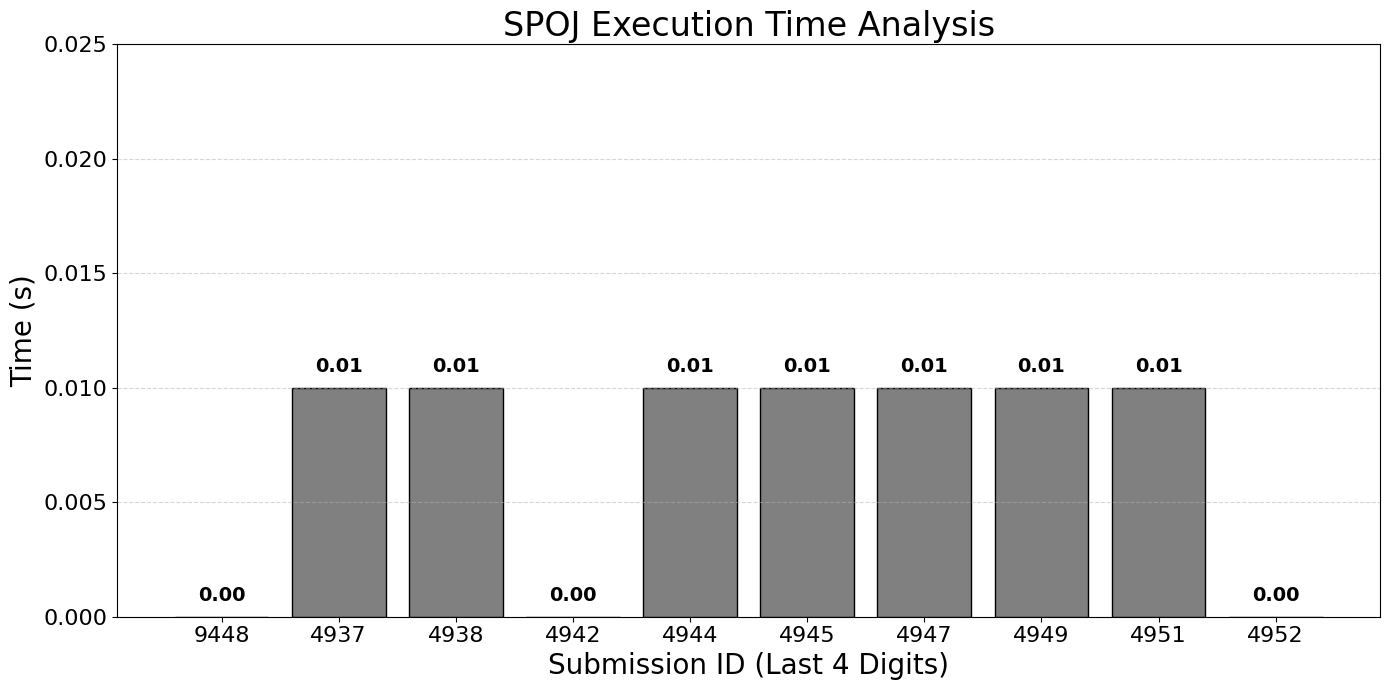

In [ ]:
plt.figure(figsize=(14, 7))
bars = plt.bar(indices, execution_times, color='#808080', edgecolor='black')

# Formatting labels and titles
plt.title("SPOJ Execution Time Analysis", fontsize=24)
plt.ylabel("Time (s)", fontsize=20)
plt.xlabel("Submission ID (Last 4 Digits)", fontsize=20)
plt.xticks(indices, [sub_id[-4:] for sub_id in ids], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0, 0.025)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding time labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0005, f"{yval:.2f}",
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('execution_time_analysis.png')

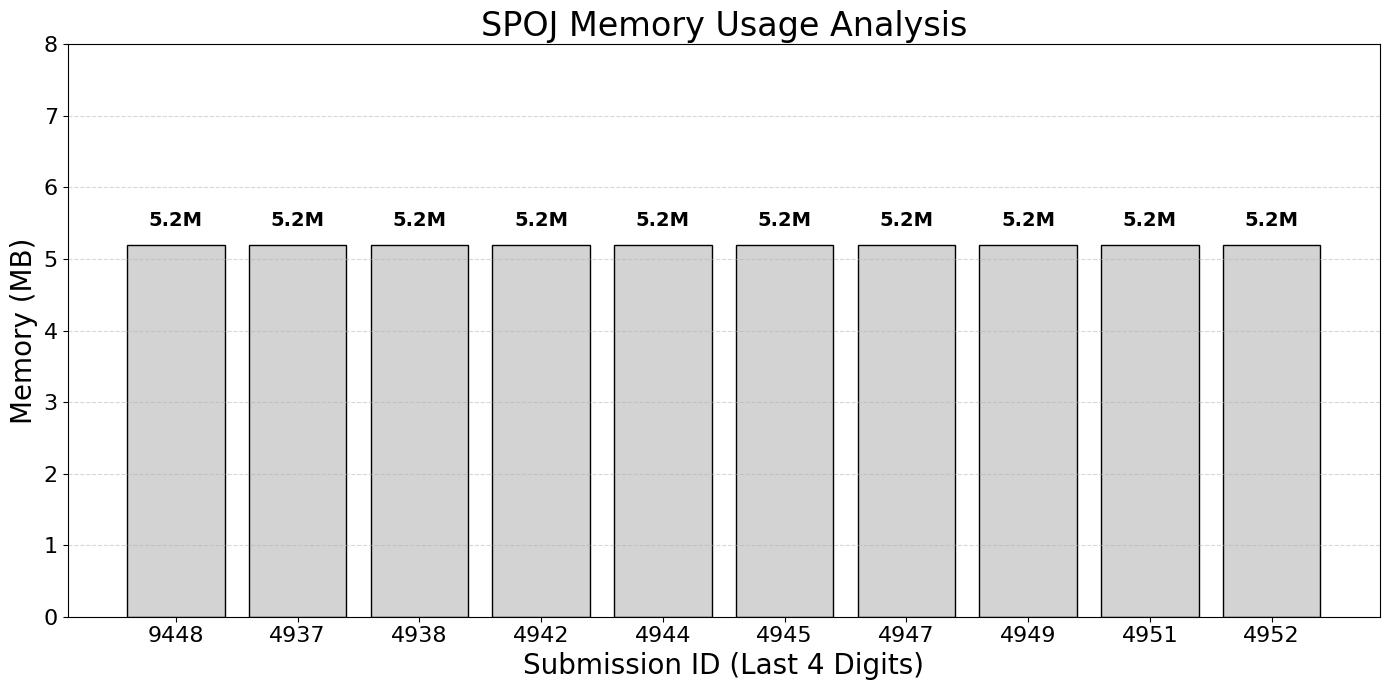

In [ ]:
plt.figure(figsize=(14, 7))
bars = plt.bar(indices, memory_usage, color='#d3d3d3', edgecolor='black')

plt.title("SPOJ Memory Usage Analysis", fontsize=24)
plt.ylabel("Memory (MB)", fontsize=20)
plt.xlabel("Submission ID (Last 4 Digits)", fontsize=20)
plt.xticks(indices, [sub_id[-4:] for sub_id in ids], fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0, 8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{yval:.1f}M",
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('memory_usage_analysis.png')